In [283]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Defining the sigmoid squashing function

In [250]:
def sigmoid(val):
  return 1 / (1 + np.exp(-val))

Calculate output function
takes both weights and the samples as input.
weights are of size (d + 1) * 1 where d is the number of features in each sample.
x_samples are of size N * (d + 1) where d is the number of features in each sample with the augmentation added

In [251]:
def calculate_output(weights, x_samples):
  output =  sigmoid(np.matmul(x_samples, weights))
  # offsetting
  for i in range(len(output)):
    if output[i] > 0.5:
      output[i] = 1
    elif output[i] < 0.5:
      output[i] = 0
  return output

update_weights_stochastic function takes as input a training sample, its label, the weights to be updated, and the learning rate.
outputs the gradient of the weight multiplied by the learning rate (i.e., η * ∇ J(W))

In [252]:
def update_weights_stochastic(x_sample, y_sample, weights, eta):
  y_hat = np.dot(x_sample, weights)
  y_hat = sigmoid(y_hat)

  # print(y_hat)

  diff = y_hat - y_sample

  gradient = x_sample * diff
  # print(gradient)
  J = eta * gradient
  # print(J)
  return J.reshape(len(weights), 1)

In [253]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [255]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [256]:
data = pd.get_dummies(data, columns = ['cp', 'ca', 'thal', 'restecg'], dtype = int)
data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,target,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,1,...,0,0,0,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,2,1,...,0,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,...,0,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,132,0,1.2,1,0,...,0,0,0,0,0,0,1,0,1,0
300,68,1,144,193,1,141,0,3.4,1,0,...,1,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,115,1,1.2,1,0,...,0,0,0,0,0,0,1,0,1,0


In [257]:
target = pd.DataFrame(data['target'])
target

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [258]:
data.drop(columns = 'target', inplace = True)
data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
       'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'restecg_0',
       'restecg_1', 'restecg_2'],
      dtype='object')

In [259]:
aug = [1 for i in range(len(data))]
data.insert(0, 'augmentation', aug, allow_duplicates = True)
data.columns

Index(['augmentation', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
       'exang', 'oldpeak', 'slope', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'ca_0',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3',
       'restecg_0', 'restecg_1', 'restecg_2'],
      dtype='object')

In [260]:
data.shape, target.shape

((303, 26), (303, 1))

In [261]:
x_train, x_test, y_train, y_test = train_test_split(data.to_numpy(copy = True), target.to_numpy(copy = True), test_size = 0.2, random_state = 42)

In [262]:
x_train.shape, y_train.shape

((242, 26), (242, 1))

Initializing the weights.

In [265]:
weights = np.zeros((26, 1))
weights

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Training the model using 50,000 epochs.

In [266]:
for i in range(50000):
  for j in range(len(x_train)):
    weights = weights - update_weights_stochastic(x_train[j], y_train[j], weights, 0.000005)

  output = calculate_output(weights.copy(), x_train.copy())
  if not(i % 1000):
    print(f'MSE @ {i} is:', mean_squared_error(y_train.copy(), output))

MSE @ 0 is: 0.45041322314049587
MSE @ 1000 is: 0.29338842975206614
MSE @ 2000 is: 0.23553719008264462
MSE @ 3000 is: 0.2024793388429752
MSE @ 4000 is: 0.17355371900826447
MSE @ 5000 is: 0.17355371900826447
MSE @ 6000 is: 0.16115702479338842
MSE @ 7000 is: 0.16115702479338842
MSE @ 8000 is: 0.16115702479338842
MSE @ 9000 is: 0.16115702479338842
MSE @ 10000 is: 0.15289256198347106
MSE @ 11000 is: 0.1487603305785124
MSE @ 12000 is: 0.15289256198347106
MSE @ 13000 is: 0.15289256198347106
MSE @ 14000 is: 0.1487603305785124
MSE @ 15000 is: 0.1487603305785124
MSE @ 16000 is: 0.1487603305785124
MSE @ 17000 is: 0.1487603305785124
MSE @ 18000 is: 0.1446280991735537
MSE @ 19000 is: 0.1446280991735537
MSE @ 20000 is: 0.1446280991735537
MSE @ 21000 is: 0.1446280991735537
MSE @ 22000 is: 0.1446280991735537
MSE @ 23000 is: 0.1446280991735537
MSE @ 24000 is: 0.1446280991735537
MSE @ 25000 is: 0.1446280991735537
MSE @ 26000 is: 0.1446280991735537
MSE @ 27000 is: 0.14049586776859505
MSE @ 28000 is: 0.14

In [291]:
print('The from-scratch model\'s accuracy is:', accuracy_score(y_test, calculate_output(weights.copy(), x_test.copy())))
print('The from-scratch model\'s precision is:', precision_score(y_test, calculate_output(weights.copy(), x_test.copy())))
print('The from-scratch model\'s recall is:', recall_score(y_test, calculate_output(weights.copy(), x_test.copy())))
print('The from-scratch model\'s f1-score is:', f1_score(y_test, calculate_output(weights.copy(), x_test.copy())))

The from-scratch model's accuracy is: 0.8852459016393442
The from-scratch model's precision is: 0.9032258064516129
The from-scratch model's recall is: 0.875
The from-scratch model's f1-score is: 0.8888888888888888


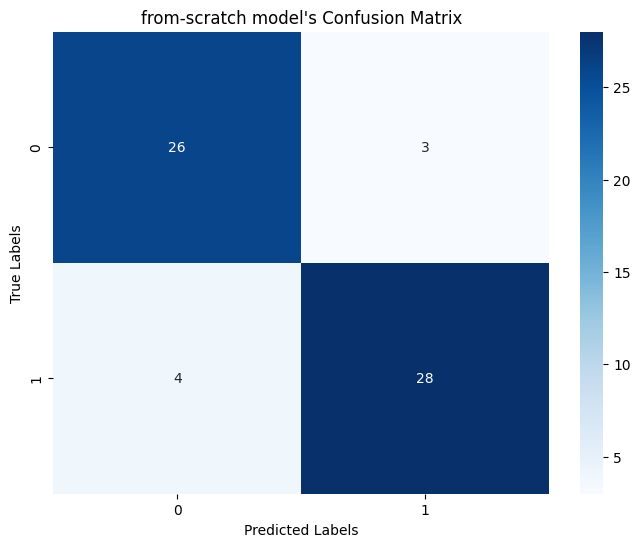

In [289]:
cm = confusion_matrix(y_test, calculate_output(weights.copy(), x_test.copy()))

xticklabels = [0, 1]
yticklabels = xticklabels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels = xticklabels, yticklabels = yticklabels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('from-scratch model\'s Confusion Matrix')
plt.show()

In [269]:
from sklearn.linear_model import LogisticRegression

In [280]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [292]:
print('The built-in model\'s accuracy is:', accuracy_score(y_test, clf.predict(x_test)))
print('The built-in model\'s precision is:', precision_score(y_test, clf.predict(x_test)))
print('The built-in model\'s recall is:', recall_score(y_test, clf.predict(x_test)))
print('The built-in model\'s f1-score is:', f1_score(y_test, clf.predict(x_test)))

The built-in model's accuracy is: 0.8852459016393442
The built-in model's precision is: 0.9032258064516129
The built-in model's recall is: 0.875
The built-in model's f1-score is: 0.8888888888888888


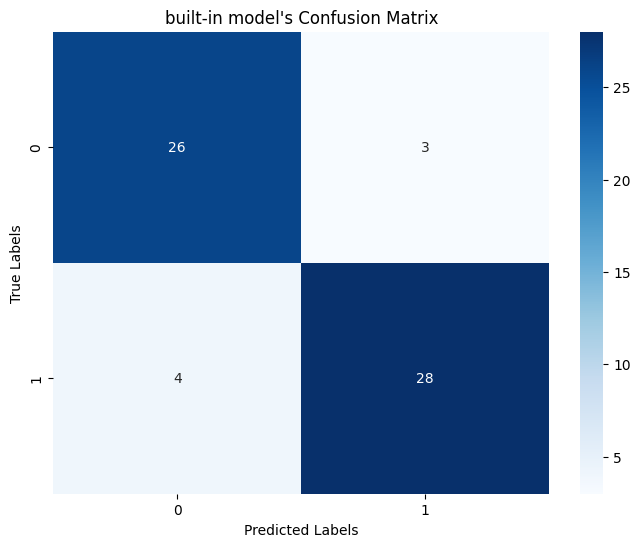

In [290]:
cm = confusion_matrix(y_test, clf.predict(x_test))

xticklabels = [0, 1]
yticklabels = xticklabels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels = xticklabels, yticklabels = yticklabels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('built-in model\'s Confusion Matrix')
plt.show()

# Discussion & summary
In implementing this logistic regression model, the preprocessing performed on the dataset used was meant to be minimal to avoid false good indications based on the evaluation metrics scores. That is, the overall performance of the model would be indicated as good because of the extensive preprocessing not because of the model in itself. In addintion, average gradient method was used to train the model but it performed poorly on the test data. This is expected to be mainly due to the small sample size of the data. Consequently, stochastic gradient method was used instead.